# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">  Step-by-Step Guide to Zero-Shot Image Classification using CLIP Model 
 </center>

Zero-shot learning allows AI systems to classify images into categories they haven’t explicitly been trained on, marking a significant advancement in computer vision and machine learning.

This blog post provides a detailed, step-by-step walkthrough of implementing zero-shot image classification with CLIP, from environment setup to final image processing and classification.

We begin by introducing the concept of zero-shot learning and its importance in modern AI applications. Next, we delve into an overview of the CLIP model, explaining its architecture and the principles behind its powerful cross-modal learning capabilities.

The guide then transitions into practical implementation, covering the essential steps of setting up the working environment, loading the CLIP model and processor, and preparing images for classification.

Readers will learn how to define custom labels for classification tasks and structure inputs for the CLIP model. The final sections detail the process of feeding data through the model and interpreting the classification results.

This blog post serves as both an educational resource for those new to zero-shot learning and a practical reference for implementing CLIP in real-world scenarios.

#### <a id="top"></a>
# <div style="box-shadow: rgb(60, 121, 245) 0px 0px 0px 3px inset, rgb(255, 255, 255) 10px -10px 0px -3px, rgb(31, 193, 27) 10px -10px, rgb(255, 255, 255) 20px -20px 0px -3px, rgb(255, 217, 19) 20px -20px, rgb(255, 255, 255) 30px -30px 0px -3px, rgb(255, 156, 85) 30px -30px, rgb(255, 255, 255) 40px -40px 0px -3px, rgb(255, 85, 85) 40px -40px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(60, 121, 245);"><b>Table of contents</b></div>

<div style="background-color: rgba(60, 121, 245, 0.03); padding:30px; font-size:15px; font-family: consolas;">
<ul>
    <li><a href="#1" target="_self" rel=" noreferrer nofollow">1. Introduction to zero-shot Image Classification </a> </li>
    <li><a href="#2" target="_self" rel=" noreferrer nofollow">2. Overview of the CLIP Model </a></li>
    <li><a href="#3" target="_self" rel=" noreferrer nofollow">3. Setting-Up Working Environment </a></li>
    <li><a href="#4" target="_self" rel=" noreferrer nofollow">4. Loading the Model and Processor </a></li>
    <li><a href="#5" target="_self" rel=" noreferrer nofollow">5. Loading and Displaying the Image </a></li>
    <li><a href="#6" target="_self" rel=" noreferrer nofollow">6. Defining Labels and Inputs </a></li>
    <li><a href="#7" target="_self" rel=" noreferrer nofollow">7. Processing and Classifying the Image </a></li>
</ul>
</div>

***



<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 1. Introduction to zero-shot Image Classification </b></div>


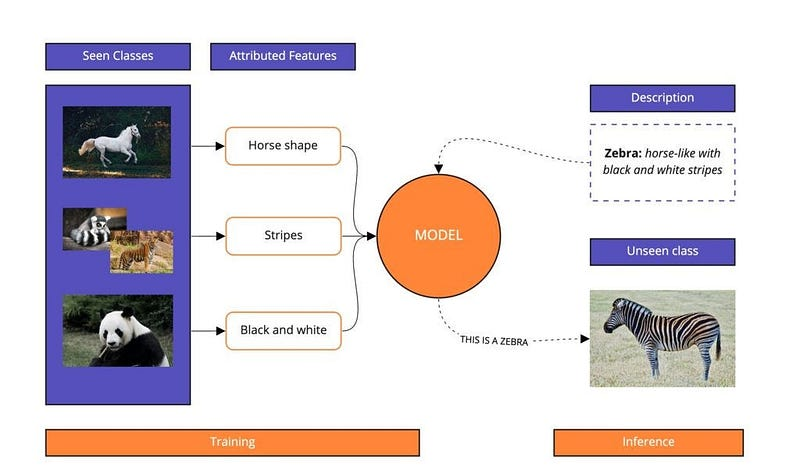

Zero-shot image classification is a task that involves classifying images into different categories using a model that hasn't been explicitly trained on those specific categories. The model's job is to predict the class it belongs to.
This is useful when you have a small amount of labeled data, or when you want to integrate image classification into an application quickly. Instead of training a custom model, you can use a pre-existing, pre-trained model.

These models are usually multi-modal and have been trained on a huge dataset of images and descriptions. They can then be used for lots of different tasks.
You might need to give the model some extra information about the classes it hasn't seen - this is called auxiliary information and could be descriptions or attributes. Zero-shot classification is a subfield of transfer learning.

The zero-shot image classification task consists of classifying an image based on your own labels during inference time. For example, you can pass a list of labels such as plane, car, dog, bird, and the image you want to classify. The model will choose the most likely label. In this case, it should classify it as a photo of a dog.
Contrastive Language-Image Pretraining (CLIP) is one of the most popular models for zero-shot classification. It can classify images by common objects or characteristics of an image and doesn't need to be fine-tuned for each new use case.

<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 2. Overview of the CLIP Model </b></div>


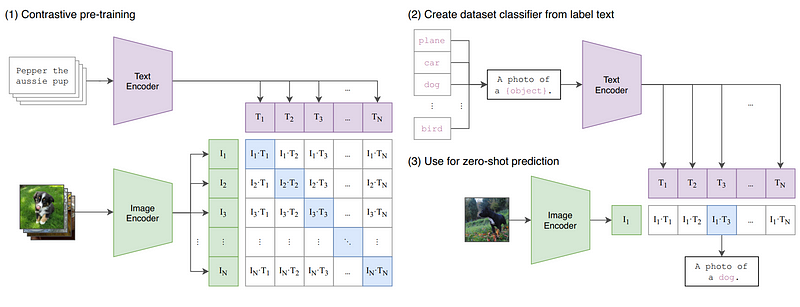

**CLIP** is a neural network that learns visual concepts from natural language supervision. It's trained on pairs of images and texts and learns to predict the text corresponding to a given image. It can then be used for zero-shot classification of new images.

CLIP is flexible and can be applied to various visual classification benchmarks. It doesn't need to optimize for the benchmark's performance and has been shown to have state-of-the-art performance and distributional robustness. It outperforms existing models such as ImageNet on representation learning evaluation using linear probes.

The network consists of an image encoder and a text encoder, which are jointly trained to predict the correct pairings. During training, the image and text encoders are trained to maximize the cosine similarity of the image and text embeddings of the real pairs, while minimizing the cosine similarity of incorrect pairings.
CyCLIP is a framework that builds on CLIP by formalizing consistency. It optimizes the learned representations to be geometrically consistent in the image and text space and has been shown to improve the performance of CLIP.

<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 3.Setting Up the Environment </b></div>


Let's start by setting up the working environments. First, we will download the packages we will use in this article. We will download the Transformers package and the torch package to use Pytorch.

In [1]:
!pip install transformers -q
!pip install torch -q

<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 4.Loading the Model and Processor </b></div>

We need two main components to build the zero-shot image classification the model and the processor. Let's first load the CLIP model from Transformers. To load the model, we will use the from_pretrained method and pass the correct checkpoint for this specific task.

In [2]:
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification
model = AutoModelForZeroShotImageClassification.from_pretrained("openai/clip-vit-large-patch14") 

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

Next, we will load a pretrained processor for the clip model using the Hugging Face Transformers library

In [3]:
processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


<a id="5"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 5.Loading and Displaying the Image </b></div>


To load the image that we will be using we will use the PIL library and import the Image class. We will load the image using Image.open and specify the path to the image. We will use the same image we have been using before.

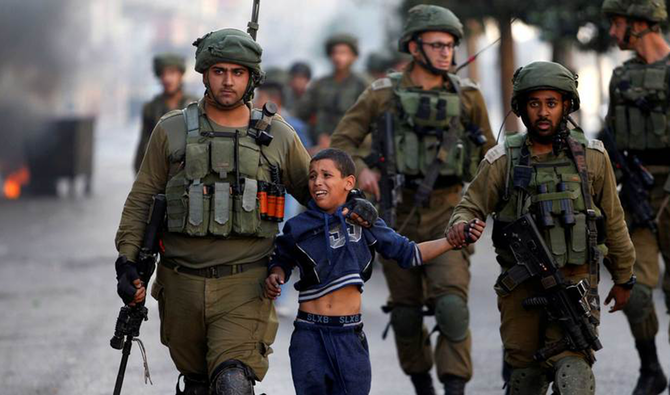

In [4]:
from PIL import Image
image = Image.open("/kaggle/input/image-dataset/rts1gd89-870_copy.png")
image

<a id="6"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 6.Defining Labels and Inputs </b></div>


Let's create the labels. We can use "a photo of occupiers" as the first label and "a photo of a cat" as the second label.

In [5]:
labels = ["a photo of a occupiers", "a photo of a cats"]

Then we need to create the input that will go into our models. To do that, we will use the processor. We need to pass the text, which are the labels, and the image.

In [6]:
inputs = processor(text=labels,
                   images=image,
                   return_tensors="pt",
                   padding=True)

<a id="7"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 7.Processing and Classifying the Image </b></div>


Now after we have added the input and the necessary details into our model. The model stores inputs as a dictionary of arguments. Let's check what we get.

In [7]:
outputs = model(**inputs)

We get a very big output, but the thing that we are interested in is the logits per image. As we've seen in previous articles, to get the probability, we need to pass these logits into our softmax layer. Let's get the probability by calling the softmax on the output per logit.

In [8]:
outputs.logits_per_image

tensor([[21.8763,  9.7856]], grad_fn=<TBackward0>)

Let's get the softmax of the logits and take the first element, which is a single tensor. As you can see, now we have something that looks like a probability. The first element is the probability that the image is indeed a photo of occupiers and the second one is the probability that the photo is a photo of a cat.

In [9]:
probs = outputs.logits_per_image.softmax(dim=1)[0]
probs

tensor([9.9999e-01, 5.6117e-06], grad_fn=<SelectBackward0>)

Finally, we can see that for the label "a photo of occupiers" the probability is practically 100%, whereas for the second label, the probability is near zero

In [10]:
probs = list(probs)
for i in range(len(labels)):
  print(f"label: {labels[i]} - probability of {probs[i].item():.4f}")

label: a photo of a occupiers - probability of 1.0000
label: a photo of a cats - probability of 0.0000
